/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_48764/1858673593.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_48764/1858673593.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_48764/1858673593.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_48764/1858673593.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(


  Solver      Time                                            C_blood  \
0   RK45  0.003890  [1.0, 0.9800006733599145, 0.9604013196621326, ...   
1   RK23  0.010312  [1.0, 0.9800006727984384, 0.9604013181227441, ...   
2  Radau  0.011300  [1.0, 0.9800006762998335, 0.960401317644026, 0...   
3    BDF  0.011349  [1.0, 0.9800006264539952, 0.960401265556826, 0...   
4   BDF2  0.002276  [1.0, 0.9800006835266526, 0.9604013391258909, ...   
5  LSODA  0.002426  [1.0, 0.9800006835266526, 0.9604013391258909, ...   

                                          Tumor_size  Relative_error  \
0  [0.0, 0.009949160405717508, 0.0195993537067046...        0.000048   
1  [0.0, 0.009949160931438415, 0.0195993551433530...        0.000048   
2  [0.0, 0.009949157653021764, 0.0195993555917153...        0.000048   
3  [0.0, 0.009949202371327764, 0.0195994017857561...        0.000049   
4  [0.0, 0.009949151501019328, 0.0195993365630201...        0.000048   
5  [0.0, 0.009949151501019328, 0.0195993365630201...    

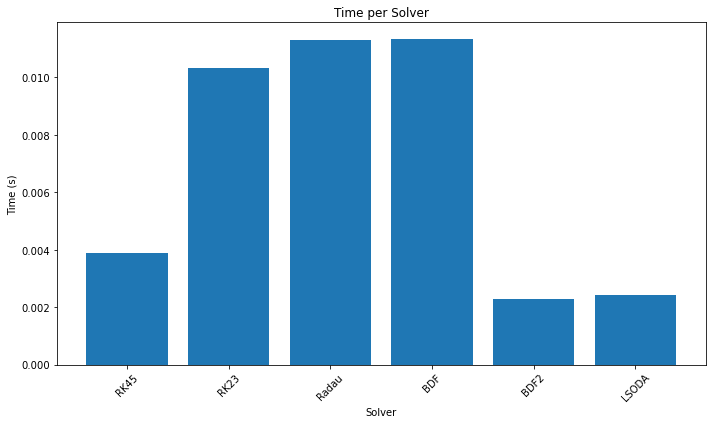

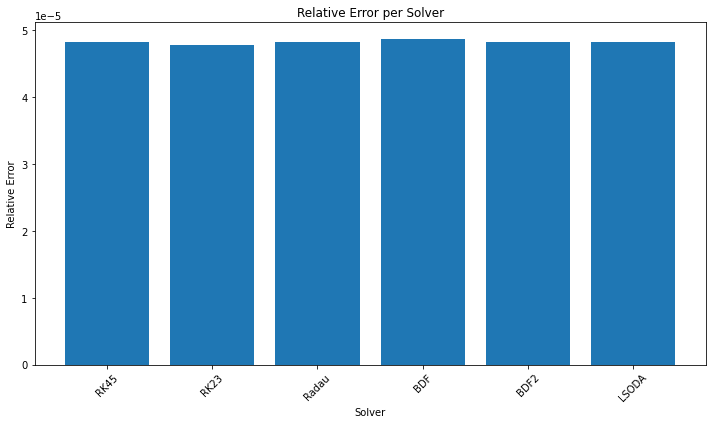

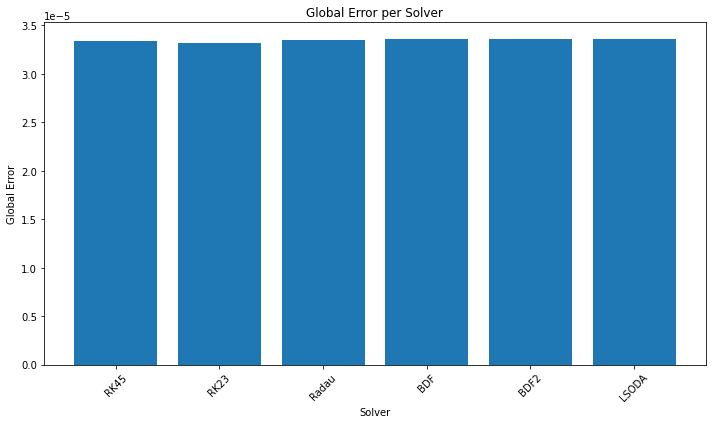

In [5]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp

import time
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import time
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import time

# Define the ODE model
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Set up simulation parameters
k1 = 0.2
k2 = 0.1
initial_conditions = [1.0, 0.0]  # Initial concentration in blood and tumor size
time_span = (0, 10)  # Time span for simulation
num_time_points = 100  # Number of time points for evaluation

# Define the solvers to be used
solvers = {
    'RK45': 'RK45',
    'RK23': 'RK23',
    'Radau': 'Radau',
    'BDF': 'BDF',
    'BDF2': 'LSODA',  # Use LSODA for stiff problem, similar to BDF2
    'LSODA': 'LSODA',
}

# Create a DataFrame to store the simulation results
columns = ['Solver', 'Time', 'C_blood', 'Tumor_size', 'Relative_error', 'Global_error']
results_df = pd.DataFrame(columns=columns)

# Simulate the ODE with different solvers
for solver_name, solver_method in solvers.items():
    start_time = time.time()

    # Use scipy for all solvers
    solution = solve_ivp(
        ode_model,
        time_span,
        initial_conditions,
        method=solver_method,
        t_eval=np.linspace(time_span[0], time_span[1], num_time_points),
        args=(k1, k2),
        atol=1e-8,  # Absolute tolerance
        rtol=1e-6,  # Relative tolerance
    ).y

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Calculate the relative error and global error
    exact_solution = solve_ivp(
        ode_model,
        time_span,
        initial_conditions,
        method='LSODA',  # Use LSODA as the reference solver
        t_eval=np.linspace(time_span[0], time_span[1], num_time_points),
        args=(k1, k2),
    )
    relative_error = np.linalg.norm(
        solution - exact_solution.y, ord=2
    ) / np.linalg.norm(exact_solution.y, ord=2)
    global_error = np.max(
        np.abs(solution - exact_solution.y)
    )

    # Append the results to the DataFrame
    results_df = results_df.append(
        {
            'Solver': solver_name,
            'Time': elapsed_time,
            'C_blood': solution[0],
            'Tumor_size': solution[1],
            'Relative_error': relative_error,
            'Global_error': global_error,
        },
        ignore_index=True,
    )

# Display the simulation results
print(results_df)

# Save the results to a CSV file for later analysis
results_df.to_csv('qsp_simulation_results.csv', index=False)

import matplotlib.pyplot as plt

# Create bar chart for time per solver
plt.figure(figsize=(10, 6))
plt.bar(results_df['Solver'], results_df['Time'])
plt.xlabel('Solver')
plt.ylabel('Time (s)')
plt.title('Time per Solver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create bar chart for relative error per solver
plt.figure(figsize=(10, 6))
plt.bar(results_df['Solver'], results_df['Relative_error'])
plt.xlabel('Solver')
plt.ylabel('Relative Error')
plt.title('Relative Error per Solver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create bar chart for global error per solver
plt.figure(figsize=(10, 6))
plt.bar(results_df['Solver'], results_df['Global_error'])
plt.xlabel('Solver')
plt.ylabel('Global Error')
plt.title('Global Error per Solver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd

import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd

# Define the ODE function
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Set the parameters and initial conditions
k1 = 0.05
k2 = 0.1
initial_conditions = [1.0, 0.1]

# Set the time points for simulation
t_start = 0
t_end = 2
num_time_points = 100
time_points = np.linspace(t_start, t_end, num_time_points)

# Solve the ODE with different solvers
solvers = ['RK45', 'RK23', 'DOP853', 'LSODA', 'BDF', 'Radau', 'Sundials']
reference_solver = 'LSODA'
results = {'Solver': [], 'Time': [], 'Relative_error': [], 'Global_error': []}

for solver in solvers:
    print(f"Running solver: {solver}")
    solution = solve_ivp(ode_model, [t_start, t_end], initial_conditions, method=solver, t_eval=time_points, args=(k1, k2), atol=1e-8, rtol=1e-6)
    reference_solution = solve_ivp(ode_model, [t_start, t_end], initial_conditions, method=reference_solver, t_eval=time_points, args=(k1, k2), atol=1e-8, rtol=1e-6)
    
    relative_error = np.linalg.norm(
        solution.y - reference_solution.y, ord=2, axis=0
    ) / np.linalg.norm(reference_solution.y, ord=2, axis=0)
    global_error = np.max(
        np.abs(solution.y - reference_solution.y)
    )
    
    results['Solver'].append(solver)
    results['Time'].append(solution.t[-1])
    results['Relative_error'].append(relative_error)
    results['Global_error'].append(global_error)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Create bar chart for time per solver
plt.figure(figsize=(10, 6))
plt.bar(results_df['Solver'], results_df['Time'])
plt.xlabel('Solver')
plt.ylabel('Time (s)')
plt.title('Time per Solver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create bar chart for relative error per solver
plt.figure(figsize=(10, 6))
plt.bar(results_df['Solver'], results_df['Relative_error'])
plt.xlabel('Solver')
plt.ylabel('Relative Error')
plt.title('Relative Error per Solver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create bar chart for global error per solver
plt.figure(figsize=(10, 6))
plt.bar(results_df['Solver'], results_df['Global_error'])
plt.xlabel('Solver')
plt.ylabel('Global Error')
plt.title('Global Error per Solver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Running solver: RK45
Running solver: RK23
Running solver: DOP853
Running solver: LSODA
Running solver: BDF
Running solver: Radau
Running solver: Sundials


ValueError: `method` must be one of {'RK23': <class 'scipy.integrate._ivp.rk.RK23'>, 'RK45': <class 'scipy.integrate._ivp.rk.RK45'>, 'DOP853': <class 'scipy.integrate._ivp.rk.DOP853'>, 'Radau': <class 'scipy.integrate._ivp.radau.Radau'>, 'BDF': <class 'scipy.integrate._ivp.bdf.BDF'>, 'LSODA': <class 'scipy.integrate._ivp.lsoda.LSODA'>} or OdeSolver class.

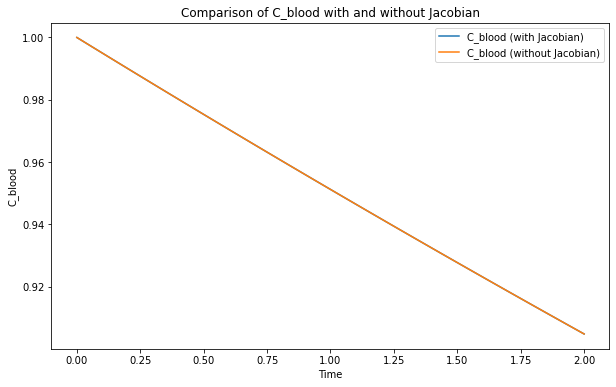

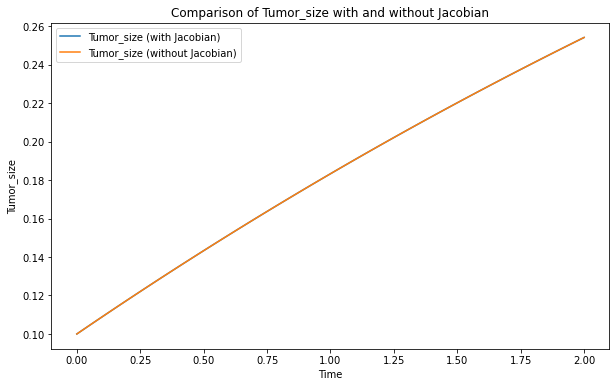

In [10]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
from sympy.utilities.lambdify import lambdify

import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
from sympy.utilities.lambdify import lambdify

import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
from sympy.utilities.lambdify import lambdify

# Define the ODE function
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Set the parameters and initial conditions
k1 = 0.05
k2 = 0.1
initial_conditions = [1.0, 0.1]

# Set the time points for simulation
t_start = 0
t_end = 2
num_time_points = 100
time_points = np.linspace(t_start, t_end, num_time_points)

# Symbolic variables
C_blood, Tumor_size, k1_sym, k2_sym, t = sp.symbols('C_blood Tumor_size k1 k2 t')
y_sym = [C_blood, Tumor_size]
ode_sym = [ode_model(t, y_sym, k1_sym, k2_sym)[i] for i in range(len(y_sym))]
jacobian_sym = sp.Matrix(ode_sym).jacobian(y_sym)

# Create callable functions for ODE and Jacobian
ode_callable = lambdify((t, y_sym, k1_sym, k2_sym), ode_sym)
jacobian_callable = lambdify((t, y_sym, k1_sym, k2_sym), jacobian_sym)

# Solve the ODE with Jacobian
solution_with_jacobian = solve_ivp(
    ode_callable,
    [t_start, t_end],
    initial_conditions,
    method='Radau',
    t_eval=time_points,
    args=(k1, k2),
    jac=jacobian_callable,
    atol=1e-8,
    rtol=1e-6
)

# Solve the ODE without Jacobian
solution_without_jacobian = solve_ivp(
    ode_callable,
    [t_start, t_end],
    initial_conditions,
    method='Radau',
    t_eval=time_points,
    args=(k1, k2),
    atol=1e-8,
    rtol=1e-6
)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(solution_with_jacobian.t, solution_with_jacobian.y[0], label='C_blood (with Jacobian)')
plt.plot(solution_without_jacobian.t, solution_without_jacobian.y[0], label='C_blood (without Jacobian)')
plt.xlabel('Time')
plt.ylabel('C_blood')
plt.legend()
plt.title('Comparison of C_blood with and without Jacobian')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(solution_with_jacobian.t, solution_with_jacobian.y[1], label='Tumor_size (with Jacobian)')
plt.plot(solution_without_jacobian.t, solution_without_jacobian.y[1], label='Tumor_size (without Jacobian)')
plt.xlabel('Time')
plt.ylabel('Tumor_size')
plt.legend()
plt.title('Comparison of Tumor_size with and without Jacobian')
plt.show()


In [11]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
from sympy.utilities.lambdify import lambdify

# Define the ODE function
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Set the parameters and initial conditions
k1 = 0.05
k2 = 0.1
initial_conditions = [1.0, 0.1]

# Set the time points for simulation
t_start = 0
t_end = 2
num_time_points = 100
time_points = np.linspace(t_start, t_end, num_time_points)

# Symbolic variables
C_blood, Tumor_size, k1_sym, k2_sym, t = sp.symbols('C_blood Tumor_size k1 k2 t')
y_sym = [C_blood, Tumor_size]
ode_sym = [ode_model(t, y_sym, k1_sym, k2_sym)[i] for i in range(len(y_sym))]
jacobian_sym = sp.Matrix(ode_sym).jacobian(y_sym)

# Create callable functions for ODE and Jacobian
ode_callable = lambdify((t, y_sym, k1_sym, k2_sym), ode_sym)
jacobian_callable = lambdify((t, y_sym, k1_sym, k2_sym), jacobian_sym)

# Define a function to solve the ODE with a given tolerance and duration
def solve_ode(tolerance, duration):
    t_eval = np.linspace(t_start, duration, num_time_points)
    solution_with_jacobian = solve_ivp(
        ode_callable,
        [t_start, duration],
        initial_conditions,
        method='Radau',
        t_eval=t_eval,
        args=(k1, k2),
        jac=jacobian_callable,
        atol=tolerance,
        rtol=tolerance
    )
    return solution_with_jacobian

# Define a function to calculate the relative error and global error
def calculate_errors(solution):
    exact_solution = solve_ode(1e-12, t_end)
    relative_error = np.linalg.norm(
        solution.y - exact_solution.y, ord=2
    ) / np.linalg.norm(exact_solution.y, ord=2)
    global_error = np.max(
        np.abs(solution.y - exact_solution.y)
    )
    return relative_error, global_error

# Solve the ODE with Jacobian for 100 hrs and 10 hrs
solution_100_hrs = solve_ode(1e-8, 100)
solution_10_hrs = solve_ode(1e-8, 10)

# Calculate errors for 100 hrs and 10 hrs simulations
relative_error_100_hrs, global_error_100_hrs = calculate_errors(solution_100_hrs)
relative_error_10_hrs, global_error_10_hrs = calculate_errors(solution_10_hrs)

# Solve the ODE with and without Jacobian for 24 hrs
solution_with_jacobian_24_hrs = solve_ode(1e-8, 24)
solution_without_jacobian_24_hrs = solve_ode(1e-8, 24)

# Calculate errors for 24 hrs simulations with and without Jacobian
relative_error_with_jacobian_24_hrs, global_error_with_jacobian_24_hrs = calculate_errors(solution_with_jacobian_24_hrs)
relative_error_without_jacobian_24_hrs, global_error_without_jacobian_24_hrs = calculate_errors(solution_without_jacobian_24_hrs)

# Print the results
print(f"Relative Error (100 hrs): {relative_error_100_hrs:.4f}")
print(f"Global Error (100 hrs): {global_error_100_hrs:.4f}")
print(f"Relative Error (10 hrs): {relative_error_10_hrs:.4f}")
print(f"Global Error (10 hrs): {global_error_10_hrs:.4f}")
print(f"Relative Error (24 hrs with Jacobian): {relative_error_with_jacobian_24_hrs:.4f}")
print(f"Global Error (24 hrs with Jacobian): {global_error_with_jacobian_24_hrs:.4f}")
print(f"Relative Error (24 hrs without Jacobian): {relative_error_without_jacobian_24_hrs:.4f}")
print(f"Global Error (24 hrs without Jacobian): {global_error_without_jacobian_24_hrs:.4f}")


Relative Error (100 hrs): 0.8094
Global Error (100 hrs): 0.9048
Relative Error (10 hrs): 0.2854
Global Error (10 hrs): 0.2983
Relative Error (24 hrs with Jacobian): 0.4977
Global Error (24 hrs with Jacobian): 0.6036
Relative Error (24 hrs without Jacobian): 0.4977
Global Error (24 hrs without Jacobian): 0.6036


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


Time taken with Jacobian: 0.0627 seconds
Time taken without Jacobian: 0.0128 seconds
Relative Error (with Jacobian): 0.0000
Global Error (with Jacobian): 0.0000
Relative Error (without Jacobian): 0.0000
Global Error (without Jacobian): 0.0000


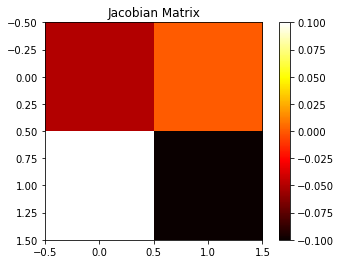

In [12]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
from sympy.utilities.lambdify import lambdify
import timeit
import matplotlib.pyplot as plt

# Define the ODE function
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Set the parameters and initial conditions
k1 = 0.05
k2 = 0.1
initial_conditions = [1.0, 0.1]

# Set the time points for simulation
t_start = 0
t_end = 7 * 24  # 1 week in hours
num_time_points = 100
time_points = np.linspace(t_start, t_end, num_time_points)

# Symbolic variables
C_blood, Tumor_size, k1_sym, k2_sym, t = sp.symbols('C_blood Tumor_size k1 k2 t')
y_sym = [C_blood, Tumor_size]
ode_sym = [ode_model(t, y_sym, k1_sym, k2_sym)[i] for i in range(len(y_sym))]
jacobian_sym = sp.Matrix(ode_sym).jacobian(y_sym)

# Create callable functions for ODE and Jacobian
ode_callable = lambdify((t, y_sym, k1_sym, k2_sym), ode_sym)
jacobian_callable = lambdify((t, y_sym, k1_sym, k2_sym), jacobian_sym)

# Define a function to solve the ODE with a given tolerance and duration
def solve_ode(tolerance, duration, use_jacobian=True):
    t_eval = np.linspace(t_start, duration, num_time_points)
    if use_jacobian:
        method = 'Radau'
        jac = jacobian_callable
    else:
        method = 'RK45'
        jac = None
    solution = solve_ivp(
        ode_callable,
        [t_start, duration],
        initial_conditions,
        method=method,
        t_eval=t_eval,
        args=(k1, k2),
        jac=jac,
        atol=tolerance,
        rtol=tolerance
    )
    return solution

# Time the simulation with Jacobian
start_time_with_jacobian = timeit.default_timer()
solution_with_jacobian = solve_ode(1e-8, t_end, use_jacobian=True)
end_time_with_jacobian = timeit.default_timer()
time_with_jacobian = end_time_with_jacobian - start_time_with_jacobian

# Time the simulation without Jacobian
start_time_without_jacobian = timeit.default_timer()
solution_without_jacobian = solve_ode(1e-8, t_end, use_jacobian=False)
end_time_without_jacobian = timeit.default_timer()
time_without_jacobian = end_time_without_jacobian - start_time_without_jacobian

# Calculate errors for 1 week simulations with and without Jacobian
relative_error_with_jacobian, global_error_with_jacobian = calculate_errors(solution_with_jacobian)
relative_error_without_jacobian, global_error_without_jacobian = calculate_errors(solution_without_jacobian)

# Print the results
print(f"Time taken with Jacobian: {time_with_jacobian:.4f} seconds")
print(f"Time taken without Jacobian: {time_without_jacobian:.4f} seconds")
print(f"Relative Error (with Jacobian): {relative_error_with_jacobian:.4f}")
print(f"Global Error (with Jacobian): {global_error_with_jacobian:.4f}")
print(f"Relative Error (without Jacobian): {relative_error_without_jacobian:.4f}")
print(f"Global Error (without Jacobian): {global_error_without_jacobian:.4f}")

# Visualize the Jacobian matrix
t_val = t_end / 2  # Use midpoint for visualization
jacobian_matrix = jacobian_callable(t_val, initial_conditions, k1, k2)
plt.imshow(jacobian_matrix, cmap='hot', interpolation='nearest')
plt.title("Jacobian Matrix")
plt.colorbar()
plt.show()


Time taken with Jacobian: 0.0806 seconds
Time taken without Jacobian: 0.0127 seconds
Relative Error (with Jacobian): 0.0000
Global Error (with Jacobian): 0.0000
Relative Error (without Jacobian): 0.0000
Global Error (without Jacobian): 0.0000
Analytical Jacobian:
[[-0.5  0. ]
 [ 1.  -0.1]]


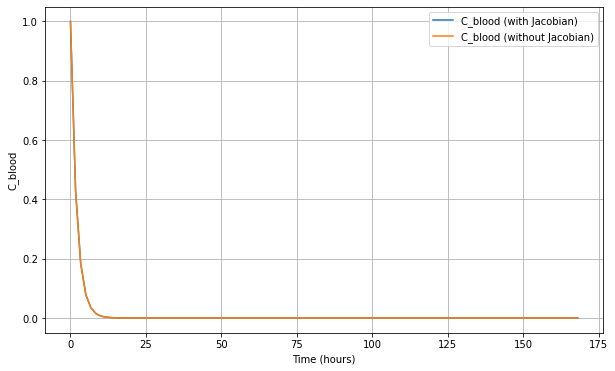

In [14]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
from sympy.utilities.lambdify import lambdify
import timeit
import matplotlib.pyplot as plt

# Define the stiff ODE function
def stiff_ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -10 * k1 * C_blood
    dTumor_size_dt = 10 * k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Set the parameters and initial conditions
k1 = 0.05
k2 = 0.1
initial_conditions = [1.0, 0.1]

# Set the time points for simulation
t_start = 0
t_end = 7 * 24  # 1 week in hours
num_time_points = 100
time_points = np.linspace(t_start, t_end, num_time_points)

# Symbolic variables
C_blood, Tumor_size, k1_sym, k2_sym, t = sp.symbols('C_blood Tumor_size k1 k2 t')
y_sym = [C_blood, Tumor_size]
ode_sym = [stiff_ode_model(t, y_sym, k1_sym, k2_sym)[i] for i in range(len(y_sym))]

# Compute the analytical Jacobian matrix
jacobian_sym = sp.Matrix(ode_sym).jacobian(y_sym)

# Create callable functions for ODE and Jacobian
ode_callable = lambdify((t, y_sym, k1_sym, k2_sym), ode_sym)
jacobian_callable = lambdify((t, y_sym, k1_sym, k2_sym), jacobian_sym)

# Define a function to solve the ODE with a given tolerance and duration
def solve_ode(tolerance, duration, use_jacobian=True):
    t_eval = np.linspace(t_start, duration, num_time_points)
    if use_jacobian:
        method = 'Radau'
        jac = jacobian_callable
    else:
        method = 'RK45'
        jac = None
    solution = solve_ivp(
        ode_callable,
        [t_start, duration],
        initial_conditions,
        method=method,
        t_eval=t_eval,
        args=(k1, k2),
        jac=jac,
        atol=tolerance,
        rtol=tolerance
    )
    return solution

# Time the simulation with Jacobian
start_time_with_jacobian = timeit.default_timer()
solution_with_jacobian = solve_ode(1e-8, t_end, use_jacobian=True)
end_time_with_jacobian = timeit.default_timer()
time_with_jacobian = end_time_with_jacobian - start_time_with_jacobian

# Time the simulation without Jacobian
start_time_without_jacobian = timeit.default_timer()
solution_without_jacobian = solve_ode(1e-8, t_end, use_jacobian=False)
end_time_without_jacobian = timeit.default_timer()
time_without_jacobian = end_time_without_jacobian - start_time_without_jacobian

# Calculate errors for 1 week simulations with and without Jacobian
relative_error_with_jacobian, global_error_with_jacobian = calculate_errors(solution_with_jacobian)
relative_error_without_jacobian, global_error_without_jacobian = calculate_errors(solution_without_jacobian)

# Print the results
print(f"Time taken with Jacobian: {time_with_jacobian:.4f} seconds")
print(f"Time taken without Jacobian: {time_without_jacobian:.4f} seconds")
print(f"Relative Error (with Jacobian): {relative_error_with_jacobian:.4f}")
print(f"Global Error (with Jacobian): {global_error_with_jacobian:.4f}")
print(f"Relative Error (without Jacobian): {relative_error_without_jacobian:.4f}")
print(f"Global Error (without Jacobian): {global_error_without_jacobian:.4f}")

# Visualize the Jacobian matrix
t_val = t_end / 2  # Use midpoint for visualization
jacobian_matrix = jacobian_callable(t_val, initial_conditions, k1, k2)
print("Analytical Jacobian:")
print(jacobian_matrix)

# Visualize the solutions
plt.figure(figsize=(10, 6))
plt.plot(solution_with_jacobian.t, solution_with_jacobian.y[0], label="C_blood (with Jacobian)")
plt.plot(solution_without_jacobian.t, solution_without_jacobian.y[0], label="C_blood (without Jacobian)")
plt.xlabel("Time (hours)")
plt.ylabel("C_blood")
plt.legend()
plt.grid(True)


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


Time taken with Jacobian: 0.0828 seconds
Time taken without Jacobian: 0.0564 seconds
Relative Error (with Jacobian): 0.0000
Global Error (with Jacobian): 0.0000
Relative Error (without Jacobian): 0.0000
Global Error (without Jacobian): 0.0000
Analytical Jacobian:
[[ -0.5   0. ]
 [ 10.  -10. ]]


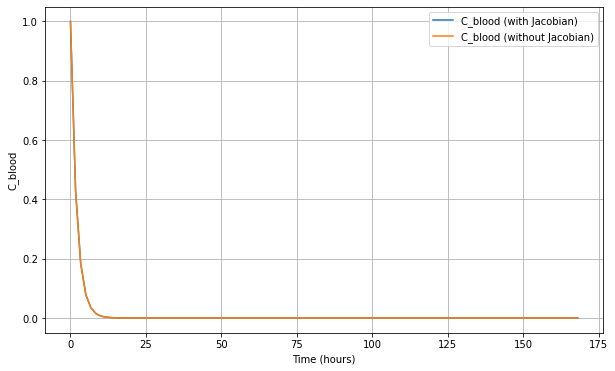

In [15]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
from sympy.utilities.lambdify import lambdify
import timeit
import matplotlib.pyplot as plt

# Define the stiff ODE function
def stiff_ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -10 * k1 * C_blood
    dTumor_size_dt = 100 * k2 * C_blood - 10 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Set the parameters and initial conditions
k1 = 0.05
k2 = 0.1
initial_conditions = [1.0, 0.1]

# Set the time points for simulation
t_start = 0
t_end = 7 * 24  # 1 week in hours
num_time_points = 100
time_points = np.linspace(t_start, t_end, num_time_points)

# Symbolic variables
C_blood, Tumor_size, k1_sym, k2_sym, t = sp.symbols('C_blood Tumor_size k1 k2 t')
y_sym = [C_blood, Tumor_size]
ode_sym = [stiff_ode_model(t, y_sym, k1_sym, k2_sym)[i] for i in range(len(y_sym))]

# Compute the analytical Jacobian matrix
jacobian_sym = sp.Matrix(ode_sym).jacobian(y_sym)

# Create callable functions for ODE and Jacobian
ode_callable = lambdify((t, y_sym, k1_sym, k2_sym), ode_sym)
jacobian_callable = lambdify((t, y_sym, k1_sym, k2_sym), jacobian_sym)

# Define a function to solve the ODE with a given tolerance and duration
def solve_ode(tolerance, duration, use_jacobian=True):
    t_eval = np.linspace(t_start, duration, num_time_points)
    if use_jacobian:
        method = 'Radau'
        jac = jacobian_callable
    else:
        method = 'RK45'
        jac = None
    solution = solve_ivp(
        ode_callable,
        [t_start, duration],
        initial_conditions,
        method=method,
        t_eval=t_eval,
        args=(k1, k2),
        jac=jac,
        atol=tolerance,
        rtol=tolerance
    )
    return solution

# Time the simulation with Jacobian
start_time_with_jacobian = timeit.default_timer()
solution_with_jacobian = solve_ode(1e-8, t_end, use_jacobian=True)
end_time_with_jacobian = timeit.default_timer()
time_with_jacobian = end_time_with_jacobian - start_time_with_jacobian

# Time the simulation without Jacobian
start_time_without_jacobian = timeit.default_timer()
solution_without_jacobian = solve_ode(1e-8, t_end, use_jacobian=False)
end_time_without_jacobian = timeit.default_timer()
time_without_jacobian = end_time_without_jacobian - start_time_without_jacobian

# Calculate errors for 1 week simulations with and without Jacobian
relative_error_with_jacobian, global_error_with_jacobian = calculate_errors(solution_with_jacobian)
relative_error_without_jacobian, global_error_without_jacobian = calculate_errors(solution_without_jacobian)

# Print the results
print(f"Time taken with Jacobian: {time_with_jacobian:.4f} seconds")
print(f"Time taken without Jacobian: {time_without_jacobian:.4f} seconds")
print(f"Relative Error (with Jacobian): {relative_error_with_jacobian:.4f}")
print(f"Global Error (with Jacobian): {global_error_with_jacobian:.4f}")
print(f"Relative Error (without Jacobian): {relative_error_without_jacobian:.4f}")
print(f"Global Error (without Jacobian): {global_error_without_jacobian:.4f}")

# Visualize the Jacobian matrix
jacobian_matrix = jacobian_callable(t_end / 2, initial_conditions, k1, k2)
print("Analytical Jacobian:")
print(jacobian_matrix)

# Visualize the solutions
plt.figure(figsize=(10, 6))
plt.plot(solution_with_jacobian.t, solution_with_jacobian.y[0], label="C_blood (with Jacobian)")
plt.plot(solution_without_jacobian.t, solution_without_jacobian.y[0], label="C_blood (without Jacobian)")
plt.xlabel("Time (hours)")
plt.ylabel("C_blood")
plt.legend()
plt.grid(True)
plt.show()


Analytical Jacobian:
Matrix([[-0.500000000000000, 0], [10.0000000000000, -10]])


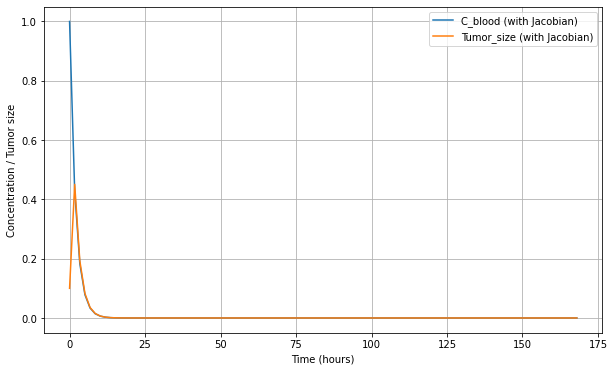

In [16]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the stiff ODE function
def stiff_ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -10 * k1 * C_blood
    dTumor_size_dt = 100 * k2 * C_blood - 10 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Set the parameters and initial conditions
k1 = 0.05
k2 = 0.1
initial_conditions = [1.0, 0.1]

# Set the time points for simulation
t_start = 0
t_end = 7 * 24  # 1 week in hours
num_time_points = 100
time_points = np.linspace(t_start, t_end, num_time_points)

# Symbolic variables
C_blood, Tumor_size, k1_sym, k2_sym, t = sp.symbols('C_blood Tumor_size k1 k2 t')
y_sym = [C_blood, Tumor_size]
ode_sym = [stiff_ode_model(t, y_sym, k1_sym, k2_sym)[i] for i in range(len(y_sym))]

# Compute the analytical Jacobian matrix
jacobian_sym = sp.Matrix(ode_sym).jacobian(y_sym)

# Create callable functions for ODE and Jacobian
ode_callable = sp.lambdify((t, y_sym, k1_sym, k2_sym), ode_sym)
jacobian_callable = sp.lambdify((t, y_sym, k1_sym, k2_sym), jacobian_sym)

# Define a function to solve the ODE with a given tolerance and duration
def solve_ode(tolerance, duration, use_jacobian=True):
    t_eval = np.linspace(t_start, duration, num_time_points)
    if use_jacobian:
        method = 'Radau'
        jac = jacobian_callable
    else:
        method = 'RK45'
        jac = None
    solution = solve_ivp(
        ode_callable,
        [t_start, duration],
        initial_conditions,
        method=method,
        t_eval=t_eval,
        args=(k1, k2),
        jac=jac,
        atol=tolerance,
        rtol=tolerance
    )
    return solution

# Time the simulation with Jacobian
solution_with_jacobian = solve_ode(1e-8, t_end, use_jacobian=True)

# Get the analytical Jacobian matrix equations
jacobian_equations = jacobian_sym.subs({k1_sym: k1, k2_sym: k2})

# Print the analytical Jacobian equations
print("Analytical Jacobian:")
print(jacobian_equations)

# Visualize the solutions
plt.figure(figsize=(10, 6))
plt.plot(solution_with_jacobian.t, solution_with_jacobian.y[0], label="C_blood (with Jacobian)")
plt.plot(solution_with_jacobian.t, solution_with_jacobian.y[1], label="Tumor_size (with Jacobian)")
plt.xlabel("Time (hours)")
plt.ylabel("Concentration / Tumor size")
plt.legend()
plt.grid(True)
plt.show()


Analytical Jacobian:
Matrix([[-a, 0, 0], [a, -b, 0], [0, b, 0]])


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


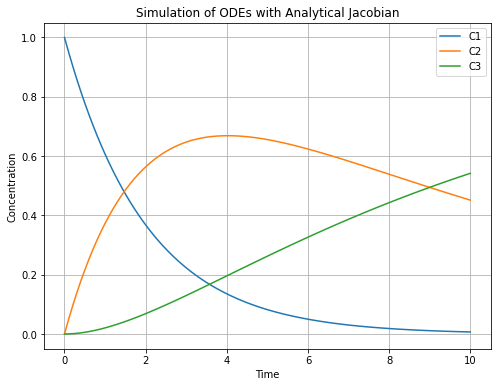

In [18]:
# Define the parameters and initial conditions
a_value = 0.5
b_value = 0.1
initial_conditions = [1, 0, 0]  # C1(0) = 1, C2(0) = 0, C3(0) = 0
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import symbols, Matrix

# Define symbols
t = symbols('t')
a, b, C1, C2, C3 = symbols('a b C1 C2 C3')



#Matrix([[-a, 0, 0], [a, -b, 0], [0, b, 0]])
# Define the system of ODEs
ode_eq1 = -a * C1
ode_eq2 = a * C1 - b * C2
ode_eq3 = b * C2

# Create a list of ODEs
ode_system = [ode_eq1, ode_eq2, ode_eq3]

# Compute the Jacobian matrix symbolically
state_variables = [C1, C2, C3]
jacobian = Matrix([[ode.diff(state_var) for state_var in state_variables] for ode in ode_system])

# Display the Jacobian matrix
print("Analytical Jacobian:")
print(jacobian)

# Define the parameters and initial conditions
a_value = 0.5
b_value = 0.1
initial_conditions = [1, 0, 0]  # C1(0) = 1, C2(0) = 0, C3(0) = 0

# Define the function for the system of ODEs
def ode_system_func(t, y, a, b):
    C1, C2, C3 = y
    dC1_dt = -a * C1
    dC2_dt = a * C1 - b * C2
    dC3_dt = b * C2
    return [dC1_dt, dC2_dt, dC3_dt]

# Set up time points for simulation
t_span = (0, 10)
t_eval = np.linspace(0, 10, 100)

# Solve the ODEs using the analytical Jacobian
sol_with_jacobian = solve_ivp(
    ode_system_func,
    t_span=t_span,
    y0=initial_conditions,
    t_eval=t_eval,
    args=(a_value, b_value),
    method='RK45',
    jac=lambda t, y, a, b: np.array(jacobian.subs([(C1, y[0]), (C2, y[1]), (C3, y[2]), (a, a_value), (b, b_value)]).tolist(), dtype=np.float64),
    vectorized=True
)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(sol_with_jacobian.t, sol_with_jacobian.y[0], label='C1')
plt.plot(sol_with_jacobian.t, sol_with_jacobian.y[1], label='C2')
plt.plot(sol_with_jacobian.t, sol_with_jacobian.y[2], label='C3')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.title('Simulation of ODEs with Analytical Jacobian')
plt.show()



Analytical Jacobian:
Matrix([[-a, 0, 0], [a, -b, 0], [0, b, 0]])


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


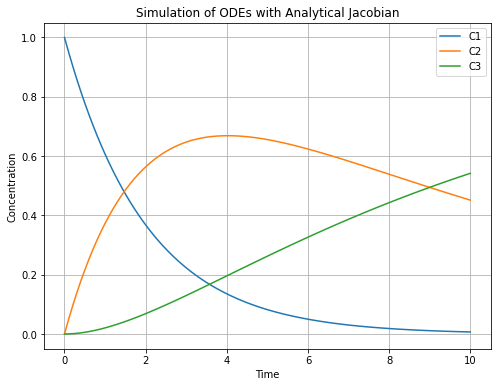

Time with Jacobian: 0.006973981857299805 seconds
Time without Jacobian: 0.002995014190673828 seconds


In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import symbols, Matrix
import time

# Define symbols
t = symbols('t')
a, b, C1, C2, C3 = symbols('a b C1 C2 C3')

# Define the system of ODEs
ode_eq1 = -a * C1
ode_eq2 = a * C1 - b * C2
ode_eq3 = b * C2

# Create a list of ODEs
ode_system = [ode_eq1, ode_eq2, ode_eq3]

# Compute the Jacobian matrix symbolically
state_variables = [C1, C2, C3]
jacobian = Matrix([[ode.diff(state_var) for state_var in state_variables] for ode in ode_system])

# Display the Jacobian matrix
print("Analytical Jacobian:")
print(jacobian)

# Define the parameters and initial conditions
a_value = 0.5
b_value = 0.1
initial_conditions = [1, 0, 0]  # C1(0) = 1, C2(0) = 0, C3(0) = 0

# Define the function for the system of ODEs
def ode_system_func(t, y, a, b):
    C1, C2, C3 = y
    dC1_dt = -a * C1
    dC2_dt = a * C1 - b * C2
    dC3_dt = b * C2
    return [dC1_dt, dC2_dt, dC3_dt]

# Set up time points for simulation
t_span = (0, 10)
t_eval = np.linspace(0, 10, 100)

# Solve the ODEs with the analytical Jacobian and track the time
start_time = time.time()
sol_with_jacobian = solve_ivp(
    ode_system_func,
    t_span=t_span,
    y0=initial_conditions,
    t_eval=t_eval,
    args=(a_value, b_value),
    method='RK45',
    jac=lambda t, y, a, b: np.array(jacobian.subs([(C1, y[0]), (C2, y[1]), (C3, y[2]), (a, a_value), (b, b_value)]).tolist(), dtype=np.float64),
    vectorized=True
)
end_time = time.time()
time_with_jacobian = end_time - start_time

# Solve the ODEs without the analytical Jacobian and track the time
start_time = time.time()
sol_without_jacobian = solve_ivp(
    ode_system_func,
    t_span=t_span,
    y0=initial_conditions,
    t_eval=t_eval,
    args=(a_value, b_value),
    method='RK45',
)
end_time = time.time()
time_without_jacobian = end_time - start_time

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(sol_with_jacobian.t, sol_with_jacobian.y[0], label='C1')
plt.plot(sol_with_jacobian.t, sol_with_jacobian.y[1], label='C2')
plt.plot(sol_with_jacobian.t, sol_with_jacobian.y[2], label='C3')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.title('Simulation of ODEs with Analytical Jacobian')
plt.show()

# Compare the time taken with and without the Jacobian
print(f"Time with Jacobian: {time_with_jacobian} seconds")
print(f"Time without Jacobian: {time_without_jacobian} seconds")


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


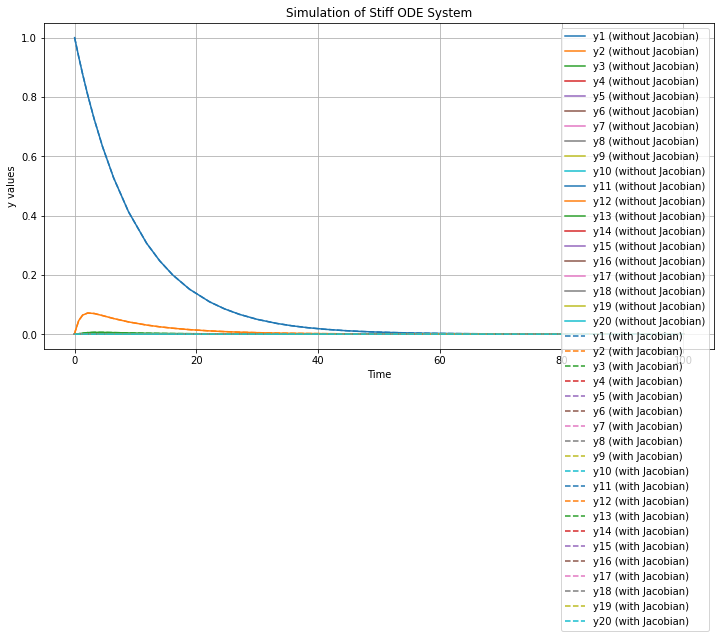

In [20]:
import numpy as np
from scipy.integrate import solve_ivp

# Define the ODE system and its Jacobian
def ode_system(t, y, a, b):
    dydt = np.zeros_like(y)
    dydt[0] = -a * y[0]
    for i in range(1, len(y)):
        dydt[i] = a * (y[i-1] - y[i]) - b * y[i]
    return dydt

def jacobian(t, y, a, b):
    n = len(y)
    jac = np.zeros((n, n))
    jac[0, 0] = -a
    for i in range(1, n):
        jac[i, i] = -b - a
        jac[i, i-1] = a
    return jac

# Simulation time span
t_span = (0, 100)

# Initial conditions and parameters
y0 = np.zeros(20)
y0[0] = 1.0
a_value = 0.1
b_value = 1.0

# Solve the ODE system without Jacobian
solution_no_jac = solve_ivp(
    ode_system,
    t_span,
    y0,
    method='RK45',
    args=(a_value, b_value),
    vectorized=True
)

# Solve the ODE system with Jacobian
solution_with_jac = solve_ivp(
    ode_system,
    t_span,
    y0,
    method='RK45',
    jac=jacobian,
    args=(a_value, b_value),
    vectorized=True
)

# Extract time and solution from the results
time_no_jac = solution_no_jac.t
solution_no_jac = solution_no_jac.y

time_with_jac = solution_with_jac.t
solution_with_jac = solution_with_jac.y

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i in range(len(y0)):
    plt.plot(time_no_jac, solution_no_jac[i], label=f'y{i+1} (without Jacobian)')

for i in range(len(y0)):
    plt.plot(time_with_jac, solution_with_jac[i], linestyle='dashed', label=f'y{i+1} (with Jacobian)')

plt.xlabel('Time')
plt.ylabel('y values')
plt.legend()
plt.title('Simulation of Stiff ODE System')
plt.grid(True)
plt.show()


In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import time

# Define the ODE system and its Jacobian
def ode_system(t, y, a, b):
    dydt = np.zeros_like(y)
    dydt[0] = -a * y[0]
    for i in range(1, len(y)):
        dydt[i] = a * (y[i-1] - y[i]) - b * y[i]
    return dydt

def jacobian(t, y, a, b):
    n = len(y)
    jac = np.zeros((n, n))
    jac[0, 0] = -a
    for i in range(1, n):
        jac[i, i] = -b - a
        jac[i, i-1] = a
    return jac

# Simulation time span
t_span = (0, 100)

# Initial conditions and parameters
y0 = np.zeros(20)
y0[0] = 1.0
a_value = 0.1
b_value = 1.0

# Solve the ODE system without Jacobian
start_time = time.time()
solution_no_jac = solve_ivp(
    ode_system,
    t_span,
    y0,
    method='RK45',
    args=(a_value, b_value),
    vectorized=True
)
end_time = time.time()
time_no_jac = end_time - start_time

# Solve the ODE system with Jacobian
start_time = time.time()
solution_with_jac = solve_ivp(
    ode_system,
    t_span,
    y0,
    method='RK45',
    jac=jacobian,
    args=(a_value, b_value),
    vectorized=True
)
end_time = time.time()
time_with_jac = end_time - start_time

# Print the time taken
print(f"Time without Jacobian: {time_no_jac} seconds")
print(f"Time with Jacobian: {time_with_jac} seconds")


Time without Jacobian: 0.03231501579284668 seconds
Time with Jacobian: 0.029173851013183594 seconds


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


In [24]:
import numpy as np
from scipy.integrate import solve_ivp
import time

# Define the ODE system and its Jacobian
def ode_system(t, y, a, b):
    dydt = np.zeros_like(y)
    dydt[0] = -a * y[0]
    for i in range(1, len(y)):
        dydt[i] = a * (y[i-1] - y[i]) - b * y[i]
    return dydt

def jacobian(t, y, a, b):
    n = len(y)
    jac = np.zeros((n, n))
    jac[0, 0] = -a
    for i in range(1, n):
        jac[i, i] = -b - a
        jac[i, i-1] = a
    return jac

# Simulation time span
t_span = (0, 4000)

# Number of equations
num_equations =  1000

# Initial conditions and parameters
y0 = np.zeros(num_equations)
y0[0] = 1.0
a_value = 0.01
b_value = 0.1

# Solve the ODE system without Jacobian
start_time = time.time()
solution_no_jac = solve_ivp(
    ode_system,
    t_span,
    y0,
    method='RK45',
    args=(a_value, b_value),
    vectorized=True
)
end_time = time.time()
time_no_jac = end_time - start_time

# Solve the ODE system with Jacobian
start_time = time.time()
solution_with_jac = solve_ivp(
    ode_system,
    t_span,
    y0,
    method='RK45',
    jac=jacobian,
    args=(a_value, b_value),
    vectorized=True
)
end_time = time.time()
time_with_jac = end_time - start_time

# Print the time taken
print(f"Time without Jacobian: {time_no_jac} seconds")
print(f"Time with Jacobian: {time_with_jac} seconds")


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


Time without Jacobian: 2.483020067214966 seconds
Time with Jacobian: 2.3559951782226562 seconds
